In [1]:
#ROC와 AUC
import pandas as pd

df = pd.read_csv('/Users/soojungchoi/pythonProject/pythonBasic/data/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [2]:
train_cols = df.columns[:-1]
print(train_cols)
X = df[train_cols]
y = df['target']

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


In [3]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)

X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=['target'])
df2 = pd.concat([X_samp,y_samp],axis=1)

In [4]:
df2['target'].value_counts()

0    499
1    499
Name: target, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=0)

In [7]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(random_state=0, max_iter=1000)
model1.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [8]:
print('학습용:',model1.score(X_train,y_train))
print('검증용:',model1.score(X_test,y_test))

학습용: 0.8524390243902439
검증용: 0.824390243902439


In [9]:
#판별함수 : 음수이면 0, 양수이면 1로 판별함, 0이 판별기준이 됨
model1.decision_function(X_test)

array([-9.88231970e-01, -5.32394404e+00, -4.78772543e+00,  7.35461465e-01,
        1.62375198e+00,  2.47049667e+00,  2.53115780e+00,  3.94099666e+00,
        1.47479378e+00, -2.53085158e+00, -4.63873579e+00, -2.15825712e+00,
       -2.42099864e+00,  2.79920156e+00, -2.83387744e+00,  1.19352560e+00,
       -9.29224703e-01,  4.54871215e+00, -2.03432256e+00, -2.03432256e+00,
       -2.82099523e+00,  1.05680435e+00, -2.20092670e-01, -2.79031517e+00,
       -3.55451501e+00, -3.73016935e+00,  7.35461681e-01,  1.23313227e-03,
        1.62660250e+00,  1.33014424e-01,  2.18279451e-02,  2.19234488e+00,
        1.74863028e+00,  2.44644122e+00, -5.52132228e-01,  1.29729289e+00,
       -2.14274871e+00,  2.29231192e+00,  2.35878828e-01,  3.13058603e+00,
       -1.78880052e-02,  1.05188682e+00,  1.77898410e-01,  1.39960565e-01,
       -2.39288890e+00,  1.33014424e-01,  1.05188682e+00,  3.01495886e+00,
        1.16683040e+00,  1.06788928e+00,  3.77526647e+00,  3.10255726e+00,
       -3.13022944e+00,  

In [10]:
from sklearn.svm import SVC
model2 = SVC(random_state=0)
model2.fit(X_train, y_train)

SVC(random_state=0)

In [11]:
print('학습용:',model2.score(X_train,y_train))
print('검증용:',model2.score(X_test,y_test))

학습용: 0.7060975609756097
검증용: 0.7121951219512195


In [12]:
model2.decision_function(X_test)

array([ 0.68256849, -0.895693  , -0.30945351,  0.20999947,  0.21281229,
        0.17007247,  1.06292776,  1.00029023,  0.95585509, -0.49188498,
        0.04261438,  0.01763071,  0.61709379,  0.46785936, -0.44021987,
       -0.13172799, -0.08805006,  1.77236215, -0.33227155, -0.33227155,
       -0.07653775, -0.5393163 , -0.5126289 ,  0.16400183, -1.43939444,
       -1.58100457,  0.72533526,  0.0181724 , -0.2212503 ,  1.40888461,
        1.38708613,  0.77244492, -0.51813303,  0.44552624,  0.47267085,
       -1.16328918,  0.14823395,  1.19855987,  0.3860362 ,  0.48798405,
        0.525585  ,  0.92675346,  0.17908726,  0.43641563, -0.66548949,
        1.40888461,  0.92675346, -0.49189593, -0.06031742,  1.44240713,
        0.47321964,  1.39424825,  0.06082416,  0.7563332 ,  1.012031  ,
       -0.83561113,  1.15016622,  0.40504363, -0.895693  ,  0.26560075,
       -1.11785566,  0.0039614 , -0.30015003,  0.93496142, -0.52897675,
       -0.53686873,  0.64690116, -1.17849197,  0.78507062, -0.19

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
#TPR(True Positive Rate, 민감도) -1을 1로 잘 맞춘 비율, y축
#FPR(False Positive Rate, 특이도) -0을 1로 틀린 비율, x축
fpr1, tpr1, thresholds1 = roc_curve(y,model1.decision_function(X))
fpr2, tpr2, thresholds2 = roc_curve(y,model2.decision_function(X))
#면적(0.5~1.0)이 1에 가까울수록(좌측상단 꼭지점에 다가갈 수록) 좋은 모형

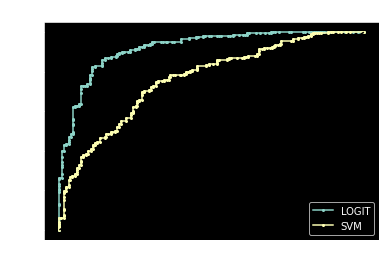

In [16]:
plt.plot(fpr1, tpr1, 'o-', ms=2, label='LOGIT')
plt.plot(fpr2, tpr2, 'o-', ms=2, label='SVM')
plt.legend()
plt.plot([0,1],[0,1],'k--',label='random guess')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()
#좌측상단 꼭지점에 가까울 수록 더 좋은 모형

In [17]:
#AUC(Area Under the Curve) : ROC Curve의 면적
#1에 가까울수록 좋은 모형
from sklearn.metrics import auc
auc(fpr1,tpr1),auc(fpr2,tpr2)

(0.9231200042670893, 0.7641099689874045)